# Quiz 6 - Object Recognition: BoF vs ConvNets
#### Edson Roteia Araujo Junior e João Pedro Moreira Ferreira

### Instructions
The goal of this quiz is to implement two object recognition approaches:

1.     A classifier based on bag of features:

    - Use SVM or Random Forest as classifiers.

    - Try different sizes for the dictionary.

2.     A classifier using ConvNet implemented in Keras:
 
     - Use an architecture inspired in the LeNet5

Your code must be implemented on a notebook python and you must use the CIFAR-10 (https://www.cs.toronto.edu/~kriz/cifar.html) for training and testing.

The notebook must present a confusion matrix and the average accuracy for each approach. You also have to report both training and test accuracies.



### Bag of Features ###

#### In order to enable the SITF module of the OpenCV library.<span style="color:red"> We install the opencv-contrib-python at version 3.4.2.16.</span> You should install it to make this notebook work. You can install it through any python package manager, since the module is in a pypi repository. More informations [here](https://pypi.org/project/opencv-contrib-python/3.4.2.16/) ####

#### Also you may need to install the <span style="color:red">scikit-image</span> module. Again it can be installed by your python package manager ####

In [4]:
import numpy as np
import cv2 
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from keras.datasets import cifar10
from keras.utils import np_utils


##CARREGAR DATASET###
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
from skimage import img_as_ubyte

def featureExtraction(sift,image):
    image = img_as_ubyte(image)
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    return keypoints, descriptors

In [6]:
sift = cv2.xfeatures2d.SIFT_create()
descriptors_list = []
for image in X_train:
    keypoints, descriptors = featureExtraction(sift,image)
    descriptors_list.append(descriptors)

In [ ]:
def classifier():
    
    return classifier

In [17]:
print(descriptors_list[0].shape,descriptors_list[1].shape,descriptors_list[2].shape)

(14, 128) (21, 128) (13, 128)


### ConvNet ###

In [2]:
# Plot ad hoc CIFAR10 instances
from keras.datasets import cifar10
from matplotlib import pyplot
from PIL import Image
# from scipy.misc import toimage -> DEPRECATED
from keras.layers import *

# load data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

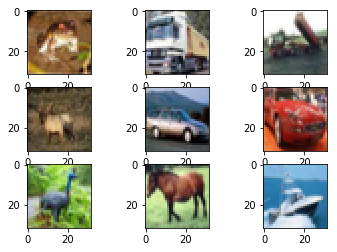

In [3]:
# create a grid of 3x3 images
for i in range(0, 9):
	pyplot.subplot(330 + 1 + i)
	pyplot.imshow(Image.fromarray(X_train[i]))
# show the plot
pyplot.show()

#### Simple Covolutional Neural Network for CIFAR-10 ####

In [12]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
from keras.layers import *
K.set_image_dim_ordering('th')

seed = 7
numpy.random.seed(seed)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), padding='same', activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_constraint=maxnorm(3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=32)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               4194816   
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
__________

#### Larger Covolutional Neural Network for CIFAR-10 ####

In [13]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

numpy.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_5 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 16, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 16, 16)        18496     
_________________________________________________________________
dropout_6 (Dropout)          (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 64, 16, 16)        36928     
__________

KeyboardInterrupt: 

#### Architecture Inspired in the LeNet5 ####

![lenet5](imgs/lenet5.jpg)

In [11]:
model = Sequential()

# model.add(Conv2D(32, (3, 3), input_shape=(3, 32, 32), activation='relu', padding='same'))
model.add(Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(3,32,32)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=10, activation = 'softmax'))

epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

numpy.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 6, 30, 30)         168       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 15, 15)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 13, 13)        880       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 6, 6)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               69240     
_________________________________________________________________
dense_7 (Dense)              (None, 84)                10164     
__________